In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/IRIS168'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/IRIS168\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 如果欄位中有 NA, describe 會有問題
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [16]:
# Ignore NA, 計算五值
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(app_train['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

[nan, nan, nan, nan, nan]


In [18]:
[~app_train['AMT_ANNUITY'].isnull()]

[0         True
 1         True
 2         True
 3         True
 4         True
 5         True
 6         True
 7         True
 8         True
 9         True
 10        True
 11        True
 12        True
 13        True
 14        True
 15        True
 16        True
 17        True
 18        True
 19        True
 20        True
 21        True
 22        True
 23        True
 24        True
 25        True
 26        True
 27        True
 28        True
 29        True
           ... 
 307481    True
 307482    True
 307483    True
 307484    True
 307485    True
 307486    True
 307487    True
 307488    True
 307489    True
 307490    True
 307491    True
 307492    True
 307493    True
 307494    True
 307495    True
 307496    True
 307497    True
 307498    True
 307499    True
 307500    True
 307501    True
 307502    True
 307503    True
 307504    True
 307505    True
 307506    True
 307507    True
 307508    True
 307509    True
 307510    True
 Name: AMT_ANNUITY, Leng

In [17]:
# Ignore NA, 計算五值
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]


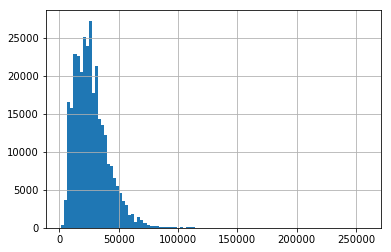

In [19]:
app_train['AMT_ANNUITY'].hist(bins = 100)
plt.show()

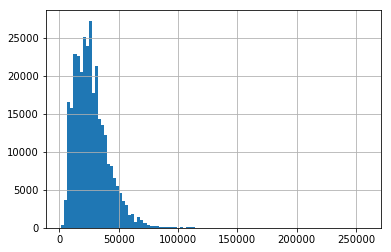

In [13]:
app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].hist(bins = 100)
plt.show()

In [20]:
# 試著將 max 取代為 q99
app_train[app_train['AMT_ANNUITY'] == app_train['AMT_ANNUITY'].max()] = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 99)

In [21]:
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 230161.5]


In [22]:
# 得到 median 的另外一種方法
np.median(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])

24903.0

In [34]:
# 計算眾數 (mode)
from scipy.stats import mode
import time

start_time = time.time()
mode_get = mode(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])
print(mode_get)
print("Elapsed time: %.3f secs" % (time.time() - start_time))

ModeResult(mode=array([-0.79150299]), count=array([307499]))
Elapsed time: 0.266 secs


In [24]:
# 計算眾數 (mode)
# 較快速的方式
from collections import defaultdict

start_time = time.time()
mode_dict = defaultdict(lambda:0)

for value in app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']:
    mode_dict[value] += 1
    
mode_get = sorted(mode_dict.items(), key=lambda kv: kv[1], reverse=True)
print(mode_get[0])
print("Elapsed time: %.3f secs" % (time.time() - start_time))

(9000.0, 6385)
Elapsed time: 0.381 secs


### 連續值標準化
#### 1. Z-transform: $ \frac{(x - mean(x))}{std(x)} $
#### 2. Range (0 ~ 1): $ \frac{x - min(x)}{max(x) - min(x)} $
#### 3. Range (-1 ~ 1): $ (\frac{x - min(x)}{max(x) - min(x)} - 0.5) * 2 $

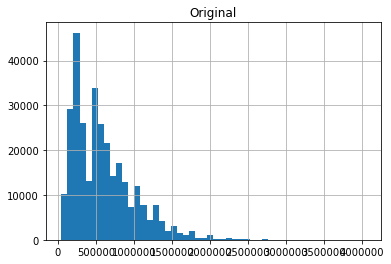

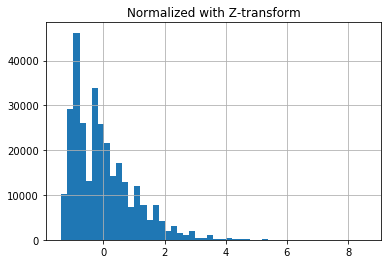

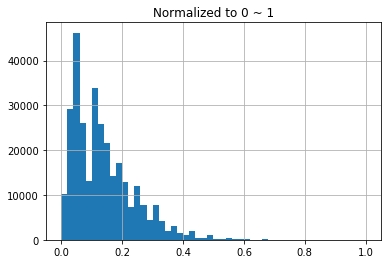

In [25]:
# 以 AMT_CREDIT 為例
app_train['AMT_CREDIT'].hist(bins = 50)
plt.title("Original")
plt.show()
value = app_train['AMT_CREDIT'].values

app_train['AMT_CREDIT_Norm1'] = ( value - np.mean(value) ) / ( np.std(value) )
app_train['AMT_CREDIT_Norm1'].hist(bins = 50)
plt.title("Normalized with Z-transform")
plt.show()

app_train['AMT_CREDIT_Norm2'] = ( value - min(value) ) / ( max(value) - min(value) )
app_train['AMT_CREDIT_Norm2'].hist(bins = 50)
plt.title("Normalized to 0 ~ 1")
plt.show()

# HW7 1. 列出 AMT_ANNUITY 的 q0 - q100

In [26]:
quantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in range(0,101)]

In [27]:
quantile_5s

[1615.5,
 6182.910000000001,
 6750.0,
 7875.0,
 8703.0,
 9000.0,
 9000.0,
 9553.5,
 10125.0,
 10503.0,
 11074.5,
 11430.0,
 11970.0,
 12375.0,
 12838.5,
 13302.0,
 13500.0,
 13500.0,
 13896.0,
 14350.5,
 14701.5,
 15124.5,
 15583.5,
 15970.5,
 16209.0,
 16524.0,
 16852.5,
 17109.0,
 17487.0,
 17806.5,
 18189.0,
 18643.5,
 19102.5,
 19417.5,
 19836.0,
 20151.0,
 20421.0,
 20853.0,
 21186.0,
 21609.0,
 21865.5,
 22018.5,
 22342.5,
 22527.0,
 22972.5,
 23346.0,
 23719.5,
 23931.0,
 24259.5,
 24583.589999999953,
 24903.0,
 25240.5,
 25537.5,
 25960.5,
 26217.0,
 26316.0,
 26640.0,
 26860.5,
 27189.0,
 27558.0,
 28062.0,
 28480.5,
 28917.0,
 29340.0,
 29830.5,
 30078.0,
 30483.0,
 30897.0,
 31275.0,
 31630.5,
 32004.0,
 32458.5,
 32895.0,
 33376.5,
 33984.0,
 34596.0,
 35345.16000000005,
 35806.5,
 36328.5,
 36747.0,
 37516.5,
 37948.5,
 38556.0,
 39456.0,
 40135.5,
 40806.0,
 41845.5,
 42790.5,
 43735.5,
 44991.0,
 45954.0,
 47254.5,
 48465.0,
 49878.0,
 51745.5,
 53325.0,
 55624.5,
 58482

In [28]:
len(quantile_5s)

101

# HW7 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補

In [31]:
app_train[~app_train['AMT_ANNUITY'].isnull()] = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 50)

# HW7 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間

In [30]:
value = app_train['AMT_ANNUITY'].values
app_train['AMT_ANNUITY'] = (( value - min(value) ) / ( max(value) - min(value) )-0.5)*2

# HW7 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [61]:
mode_GOOD_PRICE = mode(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE'])
mode_GOOD_PRICE

ModeResult(mode=array([-0.79150299]), count=array([307511]))

In [45]:
app_train[app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE']

Series([], Name: AMT_GOODS_PRICE, dtype: float64)

In [59]:
app_train[~app_train['AMT_GOODS_PRICE'].isnull()] = mode_GOOD_PRICE.mode[0]